In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("ges.csv")
df.head()

,Unnamed: 0,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,0,1AS001,1,Allied Signal,TFE731-2-2B,NaN,TF,2.64,13.90,15.60,...,1976-04-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1AS002,1,Allied Signal,TFE731-3,NaN,TF,2.64,14.30,16.50,...,1976-08-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4AL003,4,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.23,18.08,33.73,...,1995-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6AL004,6,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.10,16.60,31.50,...,1995-04-19,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6AL005,6,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.77,17.97,34.91,...,1995-04-19,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


In [54]:
# drop extra columns
df = df.drop(['Unnamed: 0','GSDB No','Combustor Description', 'Pressure Ratio','Rated Thrust (kN)',	'Data Status','Data Superseded','Superseded by UID No', 'Test Engine Status', 'Data corr as Annex 16', 'Current Engine Status',	
              'HC EI T/O (g/kg)', 'HC EI C/O (g/kg)', 'HC EI App (g/kg)', 'HC EI Idle (g/kg)','Total HC EI LTO(g/kg)', 'CO EI T/O (g/kg)', 'CO EI C/O (g/kg)', 'CO EI App (g/kg)','CO EI Idle (g/kg)', 'Total CO EI LTO(g/kg)',
              'Current Engine Status Date', 'HC Dp/Foo Sigma (g/kN)', 'HC Dp/Foo Min (g/kN)', 'HC Dp/Foo Max (g/kN)', 'HC Dp/Foo Characteristic (g/kN)', 'HC Dp/Foo Characteristic (% of Reg limit)', 'CO Dp/Foo Sigma (g/kN)',	
              'CO Dp/Foo Min (g/kN)',	'CO Dp/Foo Max (g/KN)',	'CO Dp/Foo Characteristic (g/kN)', 'CO Dp/Foo Characteristic (% of Reg limit)', 'NOx Dp/Foo Sigma (g/kN)',	'NOx Dp/Foo Min (g/kN)', 'NOx Dp/Foo Max (g/kN)', 
              'NOx Dp/Foo Characteristic (g/kN)', 'NOx Dp/Foo Characteristic (% of CAEP/2 standard)',	'NOx Dp/Foo Characteristic (% of CAEP/4 standard)',	'NOx Dp/Foo Characteristic (% of CAEP/6 standard)', 'NOx EI T/O (g/kg)', 
              'NOx EI C/O (g/kg)', 'NOx EI App (g/kg)', 'NOx EI Idle (g/kg)', 'Total NOx EI LTO(g/kg)','NOx Dp/Foo Characteristic (% of CAEP/8 standard)', 'NOx Compliance Demonstration §', 'SN T/O','SN C/O','SN App', 'SN Idle', 
              'SN Number Test', 'SN Number Eng', 'SN Max', 'NOx Dp/Foo Characteristic (% of original standard)', 'SN Sigma', 'SN Range Min', 'SN Range Max', 'SN Characteristic', 'SN Characteristic (% of Reg limit)', 'Fuel H/C Ratio Min',
              'Fuel H/C Ratio Max',	'Fuel Arom Min (%)', 'Fuel Arom Max (%)', 'Loads Power Extraction (kW)', 'Loads Power Extraction @Power', 'Loads Stage Bleed CF (%)', 'Loads Stage Bleed @Power', 'Ambient Baro Min (kPa)', 
              'Ambient Baro Max (kPa)', 'Ambient Temp Min (K)', 'Ambient Temp Max (K)', 'Humidity Min (kg/kg)', 'Humidity Max (kg/kg)', 'Test Organisation', 'Test Location', 'Initial Test Date', 'Final Test Date', 
              'Compliance with fuel venting requirements', 'Remark 1', 'Remark 2', 'Remark 3', 'Remark 4', 'Remark 5', 'Remark 6', 'Remark 7', 'Remark 8'], axis=1)

In [69]:
df = df.rename(columns={'Fuel LTO Cycle (kg/sec)':'Fuel LTO Cycle (kg)'})

In [70]:
df.columns

Index(['UID No', 'Manufacturer', 'Engine Identification', 'Eng Type',
       'B/P Ratio', 'HC Number Test', 'HC Number Eng', 'HC Dp/Foo Avg (g/kN)',
       'HC LTO Total mass (g)', 'CO Number Test', 'CO Number Eng',
       'CO Dp/Foo Avg (g/kN)', 'CO LTO Total Mass (g)', 'NOx Number Test',
       'NOx Number Eng', 'NOx Dp/Foo Avg (g/kN)', 'NOx LTO Total mass (g)',
       'Fuel Spec', 'Fuel Mass Flow T/O (kg/sec)',
       'Fuel Mass Flow C/O (kg/sec)', 'Fuel Mass Flow App (kg/sec)',
       'Fuel Mass Flow Idle (kg/sec)', 'Fuel LTO Cycle (kg)'],
      dtype='object')

In [71]:
df.tail()

,UID No,Manufacturer,Engine Identification,Eng Type,B/P Ratio,HC Number Test,HC Number Eng,HC Dp/Foo Avg (g/kN),HC LTO Total mass (g),CO Number Test,...,NOx Number Test,NOx Number Eng,NOx Dp/Foo Avg (g/kN),NOx LTO Total mass (g),Fuel Spec,Fuel Mass Flow T/O (kg/sec),Fuel Mass Flow C/O (kg/sec),Fuel Mass Flow App (kg/sec),Fuel Mass Flow Idle (kg/sec),Fuel LTO Cycle (kg)
810,1TL004,Textron Lycoming,"LF507-1F, -1H",TF,5.1,3.0,1.0,10.80,337.0,3.0,...,3.0,1.0,34.90,1086.0,0.81,0.3578,0.2961,0.1083,0.0453,151.0
811,1ZM001,IVCHENKO PROGRESS ZMBK,D-36,TF,5.0,7.0,3.0,12.00,0.0,7.0,...,7.0,3.0,56.30,0.0,RT,0.6340,0.5330,0.2110,0.0000,0.0
812,13ZM002,IVCHENKO PROGRESS ZMBK,D-36 ser. 4A,TF,5.0,7.0,3.0,12.00,0.0,7.0,...,7.0,3.0,56.30,0.0,RT,0.6340,0.5330,0.2110,0.0920,265.0
813,13ZM003,IVCHENKO PROGRESS ZMBK,D-436-148 F1,TF,4.9,8.0,8.0,5.22,0.0,8.0,...,8.0,8.0,36.18,0.0,RT,0.5480,0.4680,0.2180,0.0930,260.0
814,13ZM004,IVCHENKO PROGRESS ZMBK,D-436-148 F2,TF,4.9,8.0,8.0,3.25,0.0,8.0,...,8.0,8.0,37.96,0.0,RT,0.5810,0.4930,0.2250,0.0990,274.0


In [72]:
df.info

<bound method DataFrame.info of       UID No             Manufacturer Engine Identification Eng Type  \
0     1AS001            Allied Signal           TFE731-2-2B       TF   
1     1AS002            Allied Signal              TFE731-3       TF   
2     4AL003  Rolls-Royce Corporation               AE3007A      MTF   
3     6AL004  Rolls-Royce Corporation              AE3007C1      MTF   
4     6AL005  Rolls-Royce Corporation              AE3007A1      MTF   
..       ...                      ...                   ...      ...   
810   1TL004         Textron Lycoming         LF507-1F, -1H       TF   
811   1ZM001   IVCHENKO PROGRESS ZMBK                  D-36       TF   
812  13ZM002   IVCHENKO PROGRESS ZMBK          D-36 ser. 4A       TF   
813  13ZM003   IVCHENKO PROGRESS ZMBK          D-436-148 F1       TF   
814  13ZM004   IVCHENKO PROGRESS ZMBK          D-436-148 F2       TF   

     B/P Ratio  HC Number Test  HC Number Eng  HC Dp/Foo Avg (g/kN)  \
0         2.64             3.0  

In [73]:
# shows [# of rows, # of columns]
df.shape

(815, 23)

Data Preprocessing
- identify null/NaN values
- drop unecesarry columns
- data cleaning

In [74]:
#determines if there are any duplicates
df.duplicated().sum()

0

In [75]:
#determines if there are any null/NaN values
df.isna().sum()

UID No                          0
Manufacturer                    0
Engine Identification           0
Eng Type                        0
B/P Ratio                       0
HC Number Test                  0
HC Number Eng                   0
HC Dp/Foo Avg (g/kN)            0
HC LTO Total mass (g)           0
CO Number Test                  0
CO Number Eng                   0
CO Dp/Foo Avg (g/kN)            0
CO LTO Total Mass (g)           0
NOx Number Test                 0
NOx Number Eng                  0
NOx Dp/Foo Avg (g/kN)           0
NOx LTO Total mass (g)          0
Fuel Spec                       0
Fuel Mass Flow T/O (kg/sec)     0
Fuel Mass Flow C/O (kg/sec)     0
Fuel Mass Flow App (kg/sec)     0
Fuel Mass Flow Idle (kg/sec)    0
Fuel LTO Cycle (kg)             0
dtype: int64

In [76]:
#count NaN values in the entire df
df.isna().sum().sum()

0

In [77]:
#replace NaN values with 0
df = df.fillna(0)

In [78]:
#check to see if there are still any null values
df.isna().sum().sum()

0

In [79]:
df.tail()

,UID No,Manufacturer,Engine Identification,Eng Type,B/P Ratio,HC Number Test,HC Number Eng,HC Dp/Foo Avg (g/kN),HC LTO Total mass (g),CO Number Test,...,NOx Number Test,NOx Number Eng,NOx Dp/Foo Avg (g/kN),NOx LTO Total mass (g),Fuel Spec,Fuel Mass Flow T/O (kg/sec),Fuel Mass Flow C/O (kg/sec),Fuel Mass Flow App (kg/sec),Fuel Mass Flow Idle (kg/sec),Fuel LTO Cycle (kg)
810,1TL004,Textron Lycoming,"LF507-1F, -1H",TF,5.1,3.0,1.0,10.80,337.0,3.0,...,3.0,1.0,34.90,1086.0,0.81,0.3578,0.2961,0.1083,0.0453,151.0
811,1ZM001,IVCHENKO PROGRESS ZMBK,D-36,TF,5.0,7.0,3.0,12.00,0.0,7.0,...,7.0,3.0,56.30,0.0,RT,0.6340,0.5330,0.2110,0.0000,0.0
812,13ZM002,IVCHENKO PROGRESS ZMBK,D-36 ser. 4A,TF,5.0,7.0,3.0,12.00,0.0,7.0,...,7.0,3.0,56.30,0.0,RT,0.6340,0.5330,0.2110,0.0920,265.0
813,13ZM003,IVCHENKO PROGRESS ZMBK,D-436-148 F1,TF,4.9,8.0,8.0,5.22,0.0,8.0,...,8.0,8.0,36.18,0.0,RT,0.5480,0.4680,0.2180,0.0930,260.0
814,13ZM004,IVCHENKO PROGRESS ZMBK,D-436-148 F2,TF,4.9,8.0,8.0,3.25,0.0,8.0,...,8.0,8.0,37.96,0.0,RT,0.5810,0.4930,0.2250,0.0990,274.0


In [80]:
correlations = df.corr(method='pearson')
print(correlations['B/P Ratio'].sort_values(ascending=False).to_string())

#positive values for variables means that for example, as the NOx EI Idle increases, the B/P ratio will also increase meaning that will have a positive slope.
#negative values means there will be a negative slope. Ex: as the CO LTO Total Mass (g) increases, the B/P ratio decreases.
#The ones that are of interest to us, are the ones with strong correlation which has an absolute value that is closer to 1. For ex: NOx EI Idle (g/kg).

B/P Ratio                       1.000000
NOx LTO Total mass (g)          0.225125
NOx Number Test                 0.194173
HC Number Test                  0.170630
CO Number Test                  0.166006
Fuel Mass Flow C/O (kg/sec)     0.134723
Fuel Mass Flow T/O (kg/sec)     0.127256
Fuel Mass Flow Idle (kg/sec)    0.126329
Fuel Mass Flow App (kg/sec)     0.111688
Fuel LTO Cycle (kg)             0.106870
NOx Number Eng                 -0.054663
CO Number Eng                  -0.066527
HC Number Eng                  -0.066826
NOx Dp/Foo Avg (g/kN)          -0.218113
CO LTO Total Mass (g)          -0.256097
HC LTO Total mass (g)          -0.308559
HC Dp/Foo Avg (g/kN)           -0.322619
CO Dp/Foo Avg (g/kN)           -0.476591


Feature selection:
- Dependent Variable: [HC, CO, NOx] LTO Total Mass (g) of each emission
- Independent Variable: B/P ratio, Fuel Flow(need to convert it to Fuel Mass) 
    - Combine multiple independent variables and use 1 dependent variable

import libraries for regression (scikit learn)
- multiple graphs
    - B/P ratio affects emissions
    - fuel flow affects emissions
    - plots: scatterplot(Linear regression: fit regression line, MSE, R^2), bar graph, look into box-whisker plot

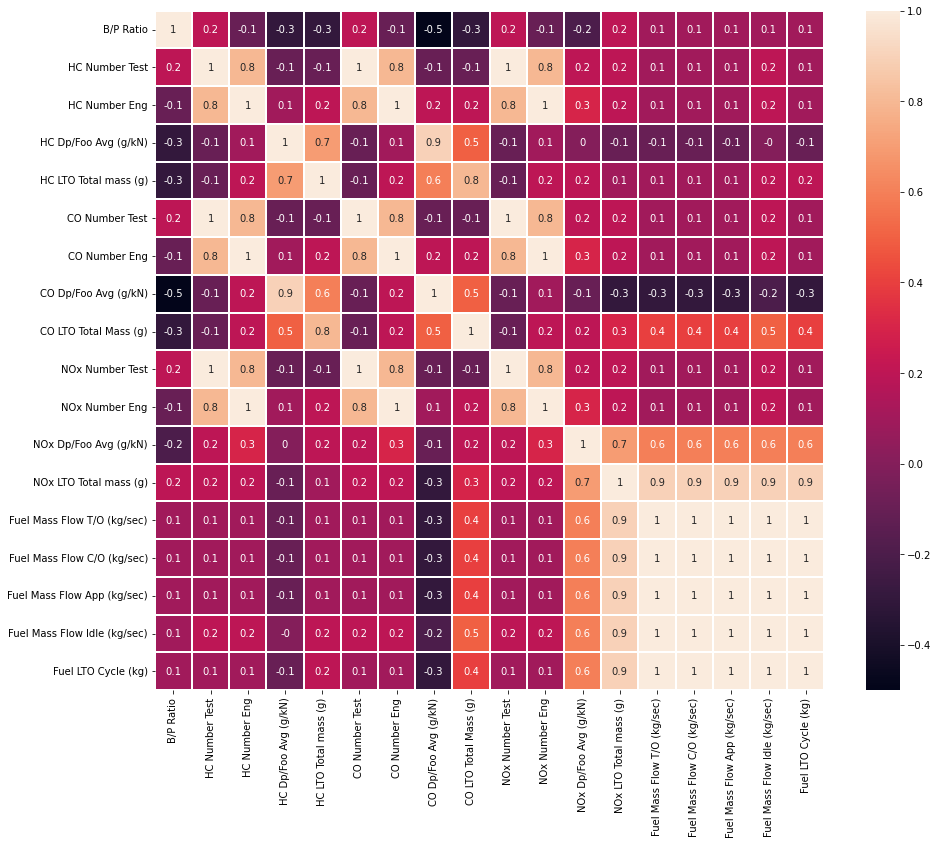

In [81]:
#heatmap

plt.figure(figsize=(15,12.5))
sns.heatmap(round(df.corr(),1),annot=True, linewidth=0.9)
sns.color_palette("flare", as_cmap=True)
plt.show();

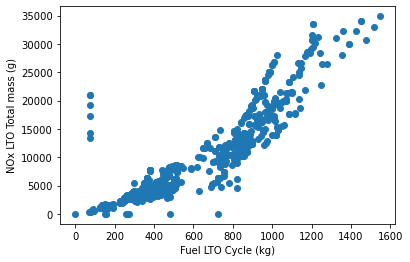

In [83]:
plt.scatter(df['Fuel LTO Cycle (kg)'], df['NOx LTO Total mass (g)'])
plt.xlabel('Fuel LTO Cycle (kg)')
plt.ylabel('NOx LTO Total mass (g)')
plt.show()

This scatterplot shows that as Fuel Flow T/O increases, NOx LTO Total Mass increases. We can also see in the heatmap that these two variables are highly correlated with a value 0.9.

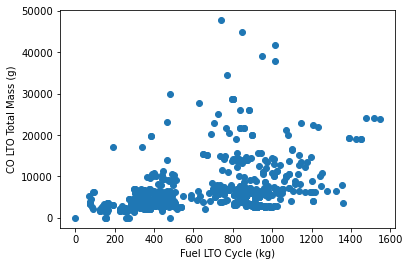

In [84]:
plt.scatter(df['Fuel LTO Cycle (kg)'], df['CO LTO Total Mass (g)'])
plt.xlabel('Fuel LTO Cycle (kg)')
plt.ylabel('CO LTO Total Mass (g)')
plt.show()

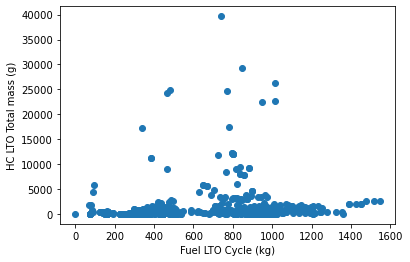

In [86]:
plt.scatter(df['Fuel LTO Cycle (kg)'], df['HC LTO Total mass (g)'])
plt.xlabel('Fuel LTO Cycle (kg)')
plt.ylabel('HC LTO Total mass (g)')
plt.show()

By doing these scatterplots, we can see that HC and CO aren't highly correlated with the Fuel LTO Cycle, whereas NOx is highly correlated. 